# Mask R-CNN Leafs Inference

A quick intro to using the pre-trained model to detect and segment objects.

In [12]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("/home/slavo/Dev/plant-disease-detection")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
LEAFS_MODEL_PATH = os.path.join(ROOT_DIR, "weights/mask_rcnn_leafs.h5")

# Directory of images to run detection on
#IMAGE_DIR = os.path.join(ROOT_DIR, "images/roztoc")
IMAGE_DIR = os.path.join(ROOT_DIR, "images/esca")

## Configurations

We'll be using a model trained on the Leafs (macik) dataset.

In [13]:
from mask_rcnn.leafs import LeafsConfig

class InferenceConfig(LeafsConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

## Create Model and Load Trained Weights

In [14]:
LEAFS_MODEL_PATH, MODEL_DIR

('/home/slavo/Dev/plant-disease-detection/weights/mask_rcnn_leafs.h5',
 '/home/slavo/Dev/plant-disease-detection/logs')

In [15]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on Leafs
model.load_weights(LEAFS_MODEL_PATH, by_name=True)

## Class Names

The model classifies objects and returns class IDs, which are integer value that identify each class. 

In [16]:
# Leaf Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('esca')
class_names = ['BG', 'esca']

## Run Object Detection

In [25]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
file_name = random.choice(file_names)
image = skimage.io.imread(os.path.join(IMAGE_DIR, file_name))

In [26]:
file_name

'IMG_7506.JPG'

In [27]:
# Run detection
results = model.detect([image], verbose=1)

Processing 1 images
image                    shape: (2160, 3840, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 3840.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [28]:
# Regions of interest
results[0]['rois']

array([[ 502, 3302,  656, 3453],
       [ 574, 2666,  766, 2857],
       [  54, 2456,  288, 2685],
       [ 776, 2550, 1003, 2775],
       [1012, 1299, 1282, 1571],
       [ 904, 2907, 1067, 3069],
       [ 524,  766,  801, 1039],
       [1516, 3523, 1683, 3690],
       [  63, 1146,  427, 1511]], dtype=int32)

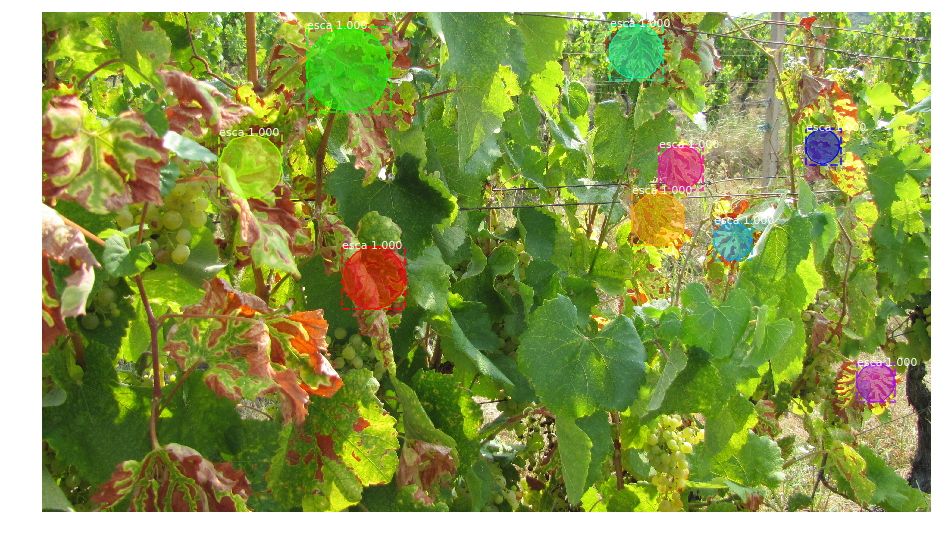

In [29]:
# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])